<center>
    <h1 style = "font-weight: bold;">Impact of Women's Education Levels on Earnings and Birth Rates</h1>
</center>
<center>
    <span style = "font-weight: bold; font-size: 1.5em;">Allison Biediger</span>
</center>
<center>
    <span style = "font-weight: bold; font-size: 1.5em;">Kathryn Rominger</span>
</center>
<center>
    DSC630
</center>

In [126]:
import pandas as pd

In [127]:
#births_df = pd.read_csv("C:/Users/kromi/OneDrive/Bellevue/Predictive Analytics/Final Project/us_births_2016_2021.csv")
#wages_df = pd.read_csv("C:/Users/kromi/OneDrive/Bellevue/Predictive Analytics/Final Project/wages_by_education.csv")
births_df = pd.read_csv("us_births_2016_2021.csv")
wages_df = pd.read_csv("wages_by_education.csv")

## **Cleaning & Prepping Wages Data**

In [128]:
wages_df.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


**For the wages data, we needed to keep only the years that aligned with the birth data (2016-2021). Additionally, because there is no race data in the birth data and race is outside of the project scope, we removed all of the columns that looked specifically at race in the wages data. Finally, we decided to narrow the scope of the analysis and only focus on women because both datasets contain data on women, but only the wages data contains data on men.**

In [129]:
#Removing data from years outside of the necessary range.
wages_df = wages_df[(wages_df['year'] >= 2016) & (wages_df['year'] <= 2021)]

wages_df.columns

Index(['year', 'less_than_hs', 'high_school', 'some_college',
       'bachelors_degree', 'advanced_degree', 'men_less_than_hs',
       'men_high_school', 'men_some_college', 'men_bachelors_degree',
       'men_advanced_degree', 'women_less_than_hs', 'women_high_school',
       'women_some_college', 'women_bachelors_degree', 'women_advanced_degree',
       'white_less_than_hs', 'white_high_school', 'white_some_college',
       'white_bachelors_degree', 'white_advanced_degree', 'black_less_than_hs',
       'black_high_school', 'black_some_college', 'black_bachelors_degree',
       'black_advanced_degree', 'hispanic_less_than_hs',
       'hispanic_high_school', 'hispanic_some_college',
       'hispanic_bachelors_degree', 'hispanic_advanced_degree',
       'white_men_less_than_hs', 'white_men_high_school',
       'white_men_some_college', 'white_men_bachelors_degree',
       'white_men_advanced_degree', 'black_men_less_than_hs',
       'black_men_high_school', 'black_men_some_college',
   

In [130]:
#Keeping only non-race specific data for women.
wages_df = wages_df.filter(regex = 'year|women')
wages_df

,year,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree,white_women_less_than_hs,white_women_high_school,white_women_some_college,white_women_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
1,2021,14.36,19.36,21.97,35.08,44.80,13.77,20.08,22.73,36.11,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,14.40,19.35,22.35,35.41,46.04,14.20,20.06,23.31,36.20,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,13.96,18.48,21.09,33.80,44.22,13.44,19.22,21.99,34.47,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,13.36,18.49,20.91,33.03,43.19,13.45,19.52,21.90,33.78,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35
5,2017,13.39,18.31,20.83,33.01,42.75,13.46,19.34,21.72,33.76,...,12.99,16.33,18.76,29.19,38.26,13.36,17.02,19.60,29.69,38.43
6,2016,13.11,18.33,20.89,32.66,42.17,12.98,19.21,21.83,33.23,...,12.42,16.71,18.88,29.56,38.55,13.40,17.11,19.26,29.41,37.77


In [131]:
#Renaming columns to facilitate merging with birth data.
wages_df = wages_df.rename(columns = lambda x: x.capitalize() if x == 'year' else x.replace('women_', ''))
wages_df.columns

Index(['Year', 'less_than_hs', 'high_school', 'some_college',
       'bachelors_degree', 'advanced_degree', 'white_less_than_hs',
       'white_high_school', 'white_some_college', 'white_bachelors_degree',
       'white_advanced_degree', 'black_less_than_hs', 'black_high_school',
       'black_some_college', 'black_bachelors_degree', 'black_advanced_degree',
       'hispanic_less_than_hs', 'hispanic_high_school',
       'hispanic_some_college', 'hispanic_bachelors_degree',
       'hispanic_advanced_degree'],
      dtype='object')

In [132]:
wages_df = wages_df.melt(id_vars = ['Year'], var_name = "Mother's Education Level", value_name = 'Wage')
wages_df

,Year,Mother's Education Level,Wage
0,2021,less_than_hs,14.36
1,2020,less_than_hs,14.40
2,2019,less_than_hs,13.96
3,2018,less_than_hs,13.36
4,2017,less_than_hs,13.39
...,...,...,...
115,2020,hispanic_advanced_degree,44.15
116,2019,hispanic_advanced_degree,42.30
117,2018,hispanic_advanced_degree,39.35
118,2017,hispanic_advanced_degree,38.43


## **Cleaning and Prepping Birth Data**

In [133]:
births_df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [134]:
births_df['Education Level of Mother'].unique()

array(['8th grade or less', '9th through 12th grade with no diploma',
       'High school graduate or GED completed',
       'Some college credit, but not a degree',
       'Associate degree (AA, AS)', "Bachelor's degree (BA, AB, BS)",
       "Master's degree (MA, MS, MEng, MEd, MSW, MBA)",
       'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)',
       'Unknown or Not Stated'], dtype=object)

To further align the datasets, we reduced the 'Education Level of Mother' column in the births DF to fit the existing education categories in the wages DF.

In [135]:
#Mapping education level codes from birth DF to corresponding education categories in wages DF.
education_mapping = {
    1: "less_than_hs",
    2: "less_than_hs",
    3: "high_school",
    4: "some_college",
    5: "some_college",
    6: "bachelors_degree",
    7: "advanced_degree",
    8: "advanced_degree",
    9: "unknown"
}

#Creating new column using mapping.
births_df["Mother's Education Level"] = births_df['Education Level Code'].map(education_mapping)

#Dropping unecessary column.
births_df = births_df.drop('Education Level of Mother', axis = 1)

births_df.head()

,State,State Abbreviation,Year,Gender,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Mother's Education Level
0,Alabama,AL,2016,F,1,1052,27.8,3116.9,less_than_hs
1,Alabama,AL,2016,F,2,3436,24.1,3040.0,less_than_hs
2,Alabama,AL,2016,F,3,8777,25.4,3080.0,high_school
3,Alabama,AL,2016,F,4,6453,26.7,3121.9,some_college
4,Alabama,AL,2016,F,5,2227,28.9,3174.3,some_college


In [136]:
#Reducing data by grouping education level by state.
births_df = births_df.groupby(['Year', "Mother's Education Level"], as_index = False).agg({
    'Number of Births': 'sum',
    'Average Age of Mother (years)': 'mean',
    'Average Birth Weight (g)': 'mean'
})

births_df

,Year,Mother's Education Level,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,2016,advanced_degree,461087,33.042157,3324.255882
1,2016,bachelors_degree,785190,31.048039,3344.605882
2,2016,high_school,979820,26.206863,3223.950000
3,2016,less_than_hs,538651,26.951961,3213.194608
4,2016,some_college,1129628,28.651471,3289.204902
5,2017,advanced_degree,456997,33.136765,3320.657843
6,2017,bachelors_degree,773944,31.141176,3342.758824
7,2017,high_school,973025,26.307843,3219.581373
8,2017,less_than_hs,505626,27.117647,3209.135784
9,2017,some_college,1096349,28.774020,3278.372059


## Merging DataFrames

In [137]:
df = pd.merge(births_df, wages_df, on = ['Year', "Mother's Education Level"], how = 'inner')
df

,Year,Mother's Education Level,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Wage
0,2016,advanced_degree,461087,33.042157,3324.255882,42.17
1,2016,bachelors_degree,785190,31.048039,3344.605882,32.66
2,2016,high_school,979820,26.206863,3223.950000,18.33
3,2016,less_than_hs,538651,26.951961,3213.194608,13.11
4,2016,some_college,1129628,28.651471,3289.204902,20.89
5,2017,advanced_degree,456997,33.136765,3320.657843,42.75
6,2017,bachelors_degree,773944,31.141176,3342.758824,33.01
7,2017,high_school,973025,26.307843,3219.581373,18.31
8,2017,less_than_hs,505626,27.117647,3209.135784,13.39
9,2017,some_college,1096349,28.774020,3278.372059,20.83


***
***
## **Variable Exploration**

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

#Defining custom legend labels.
legend_labels = {
    'less_than_hs': "Less than High School",
    'high_school': "High School Diploma or GED",
    'some_college': "Some College",
    'bachelors_degree': "Bachelor's Degree",
    'advanced_degree': "Advanced Degree"
}

#Defining the desired order of categories.
category_order = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']

C:\Users\allie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


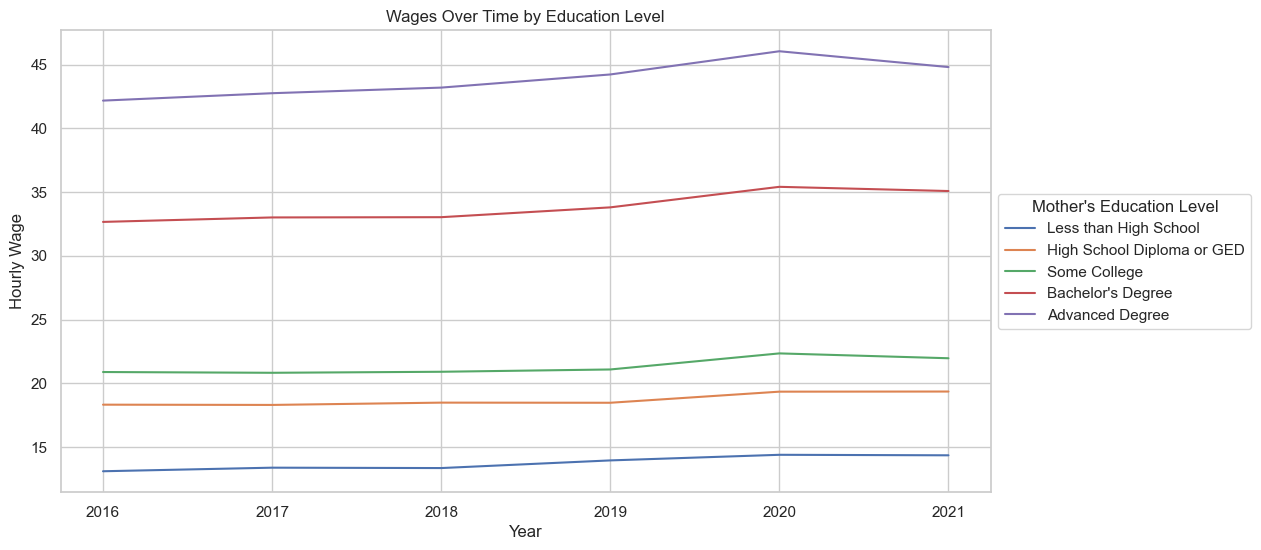

In [139]:
sns.set(style="whitegrid")

#Plot for Wages over Time
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'Year', y = 'Wage', hue = "Mother's Education Level", hue_order = category_order)
plt.title('Wages Over Time by Education Level')
plt.xlabel('Year')
plt.ylabel('Hourly Wage')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, [legend_labels.get(level, level) for level in category_order], title = "Mother's Education Level", loc = 'center left',
           bbox_to_anchor = (1, 0.5))

plt.show()

Wages over time for women follow the expected trend, where women with higher levels of education earn higher wages than their less educated counterparts.

C:\Users\allie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


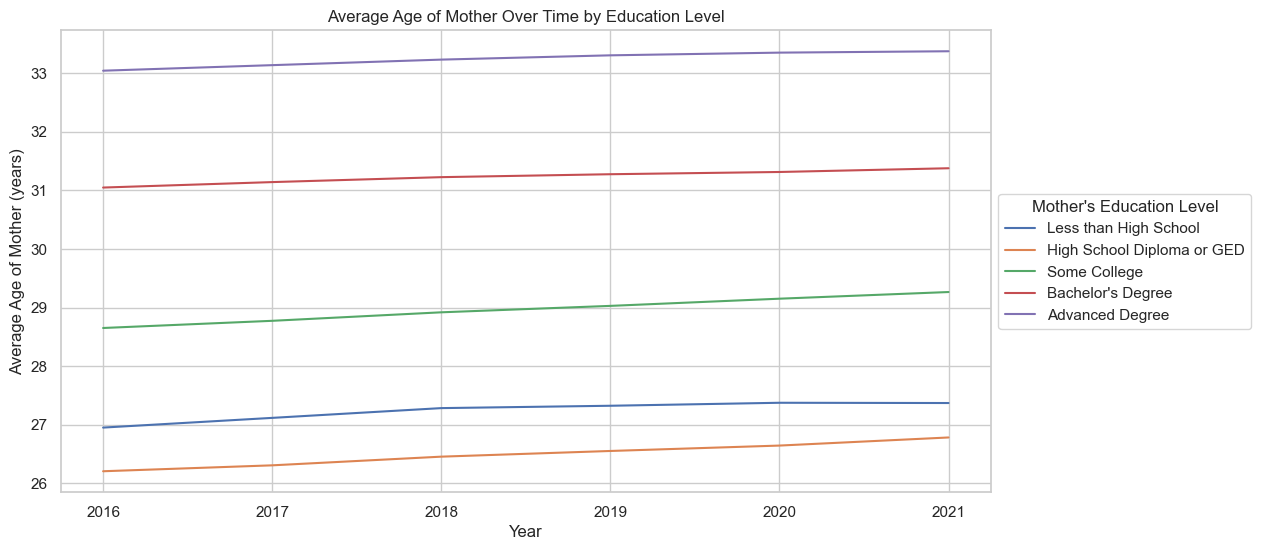

In [140]:
sns.set(style="whitegrid")

#Plot for Average Age of Mother over Time
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'Year', y = 'Average Age of Mother (years)', hue = "Mother's Education Level", hue_order = category_order)
plt.title('Average Age of Mother Over Time by Education Level')
plt.xlabel('Year')
plt.ylabel('Average Age of Mother (years)')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, [legend_labels.get(level, level) for level in category_order], title="Mother's Education Level", loc = 'center left',
           bbox_to_anchor = (1, 0.5))

plt.show()

Age of the mother at time of birth follows the expected trend, where women with higher levels of education wait to have children and are thus older than their less educated counterparts.

***
***
# **Linear Regresion Model**

# - Wage

In [142]:
#Mapping the Education column
education_mapping = {
    "less_than_hs": 0,
    "high_school": 1,
    "some_college": 2,
    "bachelors_degree": 3,
    "advanced_degree": 4
}
df["Mother's Education Level"] = df["Mother's Education Level"].map(education_mapping)

In [143]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
#Selecting features and target
#TARGETING WAGE

X = df[['Year', 'Mother\'s Education Level', 'Number of Births', 
          'Average Age of Mother (years)', 'Average Birth Weight (g)']]

y = df['Wage']

In [145]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [146]:
#Fitting the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [147]:
# Making Predictions and Evaluating Performance
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3337689945396049
R-squared: 0.9969002614819427


#### This model proved to be very accurate, this can be seen with the MSE and R2 values. The MSE of 0.3338 showed that on average the squared differences between the actual values was very small. Thus with lower MSE values the model shows better predictive accuracy, as it is making small errors. The R2 of 0.9969 showcased the models abilit to explain 99.96% of the variance in the target variable. The R2 being close to 1 showed this model accurately captured the relationships between features and target variable.

# - Birth

In [148]:
X = df[['Year', 'Mother\'s Education Level', 'Wage', 
          'Average Age of Mother (years)', 'Average Birth Weight (g)']]

y = df['Number of Births']

In [149]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
#Fitting the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [151]:
# Making Predictions and Evaluating Performance
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 846962811.1469213
R-squared: 0.9887489797193042


**This model has a lower prediction accuracy than the Wages model, as shown by the very large MSE score (846,962,811.15), indicated there is a significant difference between the predicted and actual number of births. However, the R2 indicates that 98.87% of the variance in number of births is explained by the model. The contrast of the two values suggests a substantial error due to large values.**  


***
***
# **Random Forest Moddel**

# - Wage

In [153]:
X = df[['Mother\'s Education Level', 'Number of Births', 'Average Age of Mother (years)', 'Average Birth Weight (g)']]
y = df['Wage']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [157]:
# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3446770783333402
R-squared: 0.9967989572624172


#### These evaluation metrics showed that this model was slightly less accurate in its predictions than the linear regeression model used above when predicting the wage.

# - Births

In [159]:
X = df[['Mother\'s Education Level', 'Average Age of Mother (years)', 'Average Birth Weight (g)', 'Wage']]
y = df['Number of Births']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [162]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2185128304.734068
R-squared: 0.9709728425511465


#### The MSE in this model is notably higher than the MSE for the linear regression nodel suggesting that the random forest model has a higher average prediction error thatn the linear regression model for this dataset. The R2 was also lower than that of the linear regression showing that the random forest model does not fit the data as well.

***
***

# **Time Series Analysis**

## **Advanced Degree - Wage**

In [52]:
from statsmodels.tsa.arima.model import ARIMA


In [55]:
advanced_degree_data = df[df["Mother's Education Level"] == 4]
advanced_degree_data

,Mother's Education Level,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Wage
Year,,,,,
2016-01-01,4,461087,33.042157,3324.255882,42.17
2017-01-01,4,456997,33.136765,3320.657843,42.75
2018-01-01,4,461828,33.231373,3321.216667,43.19
2019-01-01,4,464173,33.304412,3312.855392,44.22
2020-01-01,4,456055,33.350490,3310.718627,46.04
2021-01-01,4,488611,33.374020,3305.979902,44.80


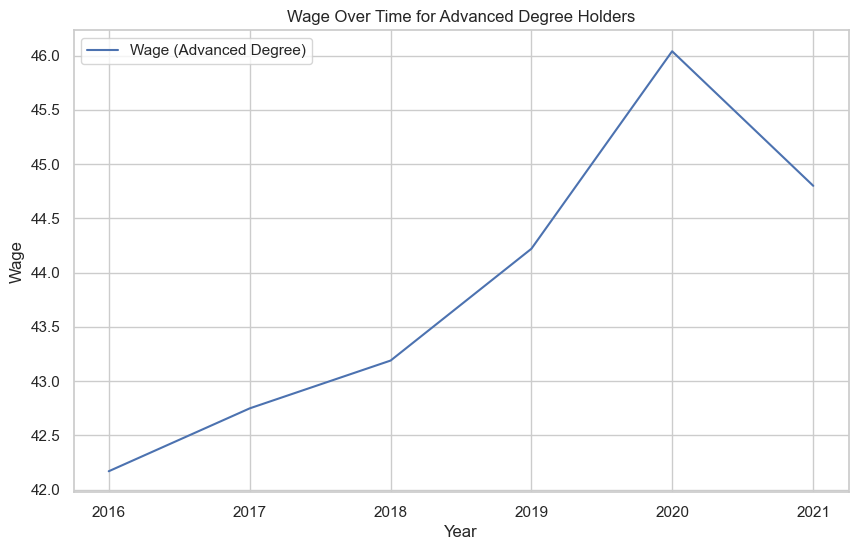

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(advanced_degree_data['Wage'], label='Wage (Advanced Degree)')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.title('Wage Over Time for Advanced Degree Holders')
plt.legend()
plt.show()

In [78]:
model = ARIMA(advanced_degree_data['Wage'], order=(1, 1, 1))  
model_fit = model.fit()

C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

In [58]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2022-01-01    44.509312
2023-01-01    44.734572
2024-01-01    44.560013
2025-01-01    44.695283
2026-01-01    44.590459
Freq: AS-JAN, Name: predicted_mean, dtype: float64


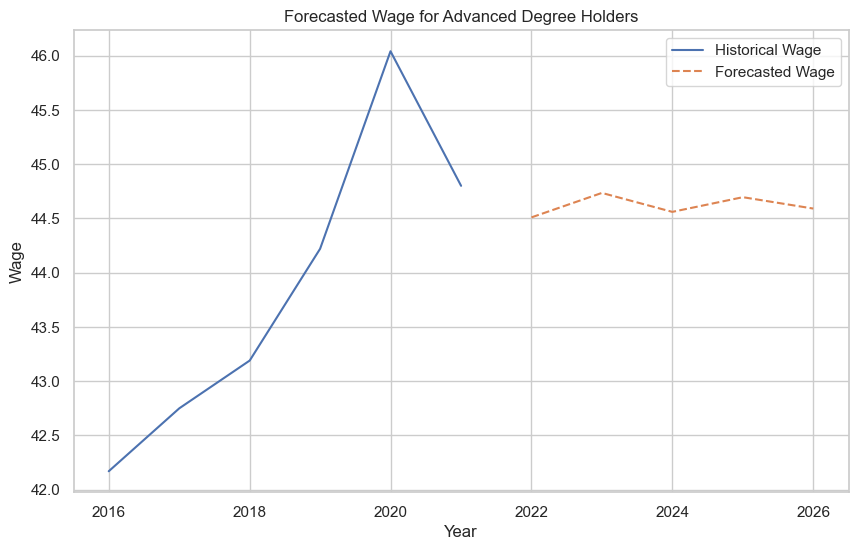

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(advanced_degree_data['Wage'], label='Historical Wage')
plt.plot(forecast, label='Forecasted Wage', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.title('Forecasted Wage for Advanced Degree Holders')
plt.legend()
plt.show()

## **Advanced Degree -Births**

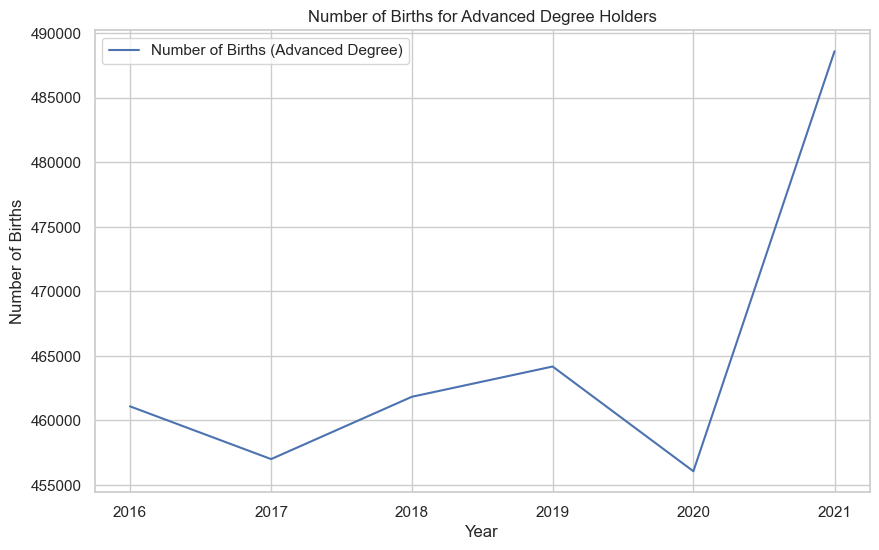

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(advanced_degree_data['Number of Births'], label='Number of Births (Advanced Degree)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births for Advanced Degree Holders')
plt.legend()
plt.show()

In [77]:
model = ARIMA(advanced_degree_data['Number of Births'], order=(1, 1, 1))  
model_fit = model.fit()

C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimi

In [70]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2022-01-01    460824.123268
2023-01-01    463140.965825
2024-01-01    462947.789762
2025-01-01    462963.896593
2026-01-01    462962.553621
Freq: AS-JAN, Name: predicted_mean, dtype: float64


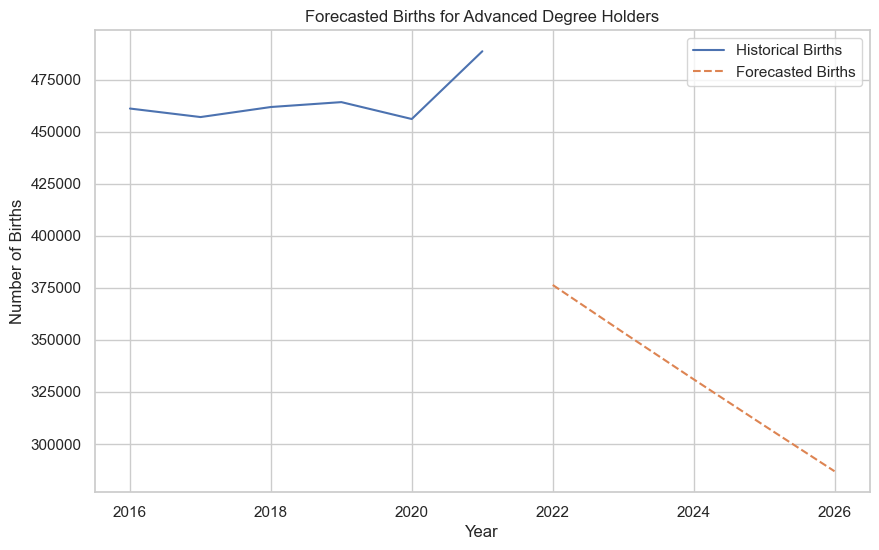

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(advanced_degree_data['Number of Births'], label='Historical Births')
plt.plot(forecast, label='Forecasted Births', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Forecasted Births for Advanced Degree Holders')
plt.legend()
plt.show()

***
***
# **Time Series Analysis**
## **Bachelors Degree - Wage**

In [60]:
bachelors_degree_data = df[df["Mother's Education Level"] == 3]
bachelors_degree_data

,Mother's Education Level,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Wage
Year,,,,,
2016-01-01,3,785190,31.048039,3344.605882,32.66
2017-01-01,3,773944,31.141176,3342.758824,33.01
2018-01-01,3,773821,31.225490,3339.198039,33.03
2019-01-01,3,771905,31.275490,3328.489216,33.80
2020-01-01,3,753630,31.313725,3330.687255,35.41
2021-01-01,3,794694,31.377451,3323.760784,35.08


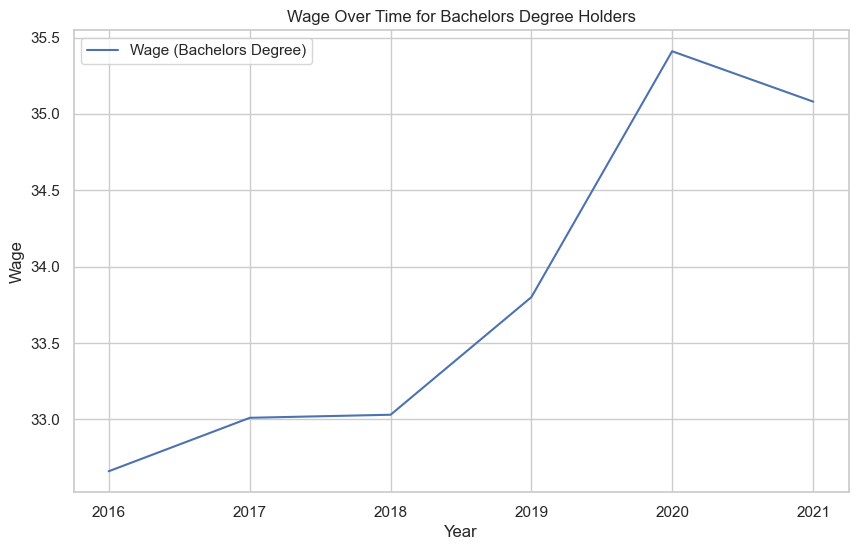

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(bachelors_degree_data['Wage'], label='Wage (Bachelors Degree)')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.title('Wage Over Time for Bachelors Degree Holders')
plt.legend()
plt.show()

In [99]:
model = ARIMA(bachelors_degree_data['Wage'], order=(1, 1, 1)) 
model_fit = model.fit()

C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

In [100]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2022-01-01    34.638685
2023-01-01    34.838175
2024-01-01    34.747999
2025-01-01    34.788761
2026-01-01    34.770335
Freq: AS-JAN, Name: predicted_mean, dtype: float64


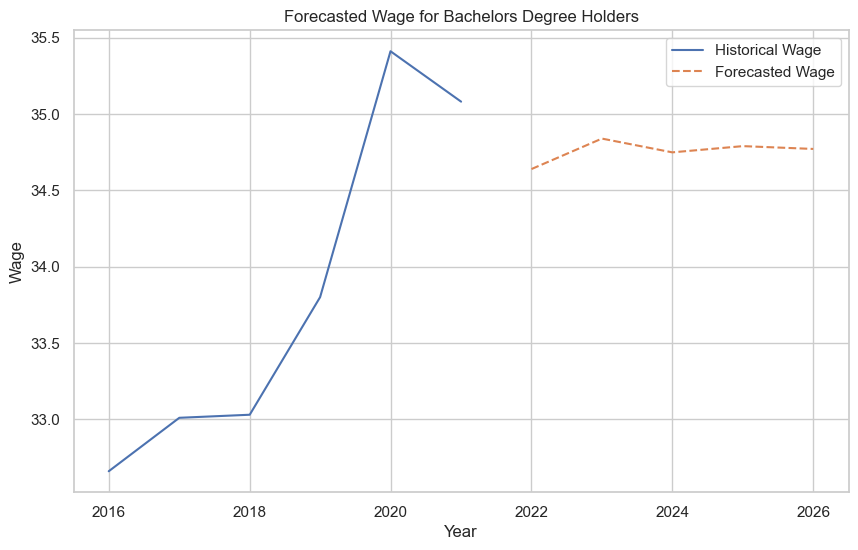

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(bachelors_degree_data['Wage'], label='Historical Wage')
plt.plot(forecast, label='Forecasted Wage', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.title('Forecasted Wage for Bachelors Degree Holders')
plt.legend()
plt.show()

## **Bachelors Degree - Births**

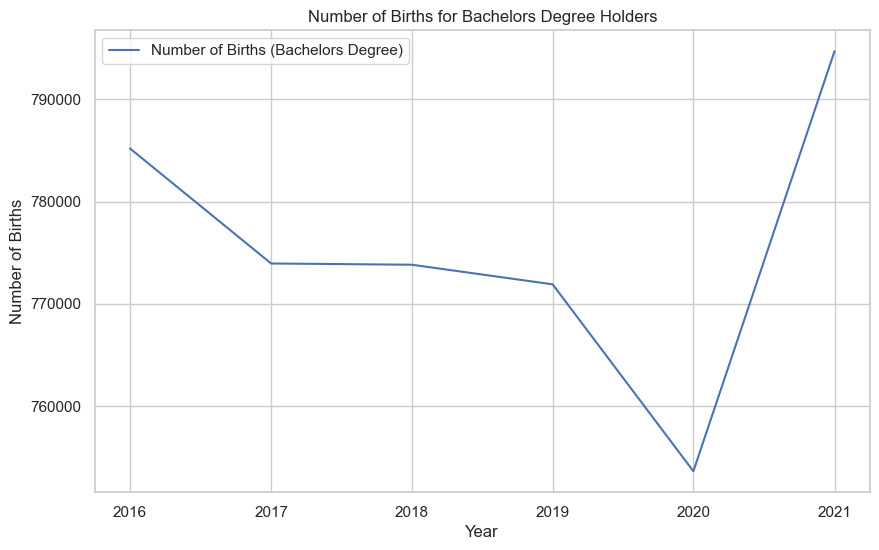

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(bachelors_degree_data['Number of Births'], label='Number of Births (Bachelors Degree)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births for Bachelors Degree Holders')
plt.legend()
plt.show()

In [163]:
model = ARIMA(bachelors_degree_data['Number of Births'], order=(1, 1, 1)) 
model_fit = model.fit()

C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

In [164]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2022-01-01    794694.023673
2023-01-01    794694.023673
2024-01-01    794694.023673
2025-01-01    794694.023673
2026-01-01    794694.023673
Freq: AS-JAN, Name: predicted_mean, dtype: float64


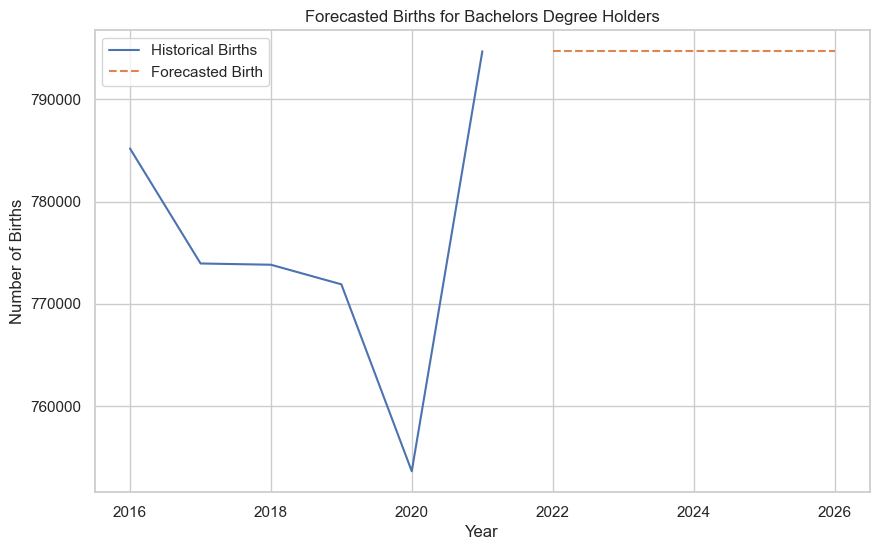

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(bachelors_degree_data['Number of Births'], label='Historical Births')
plt.plot(forecast, label='Forecasted Birth', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Forecasted Births for Bachelors Degree Holders')
plt.legend()
plt.show()

***
***
# **Time Series Analysis**
## **Some College - Wage**

In [85]:
some_college_data = df[df["Mother's Education Level"] == 2]
some_college_data

,Mother's Education Level,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Wage
Year,,,,,
2016-01-01,2,1129628,28.651471,3289.204902,20.89
2017-01-01,2,1096349,28.774020,3278.372059,20.83
2018-01-01,2,1064589,28.919118,3277.010294,20.91
2019-01-01,2,1038250,29.028922,3266.955882,21.09
2020-01-01,2,984765,29.151471,3267.944608,22.35
2021-01-01,2,979388,29.265196,3259.256373,21.97


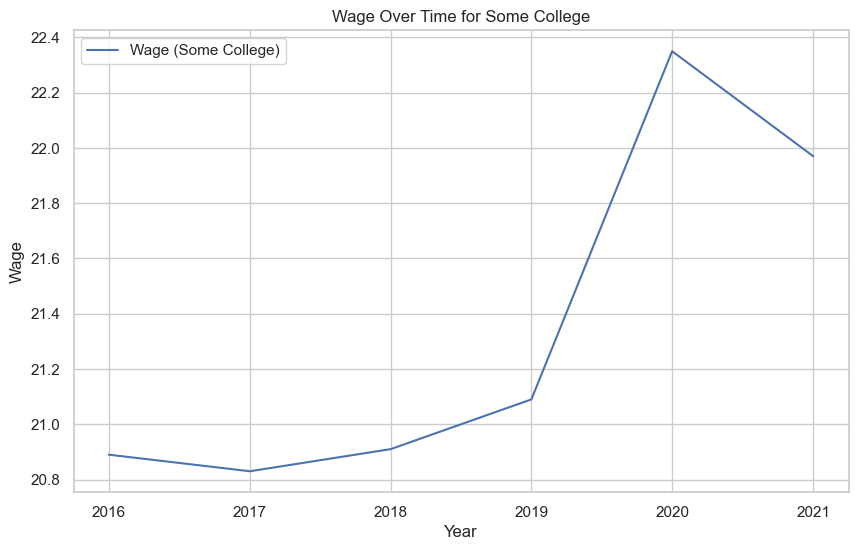

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(some_college_data['Wage'], label='Wage (Some College)')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.title('Wage Over Time for Some College')
plt.legend()
plt.show()

In [87]:
model = ARIMA(some_college_data['Wage'], order=(1, 1, 1)) 
model_fit = model.fit()

C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

In [88]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2022-01-01    22.105787
2023-01-01    21.998936
2024-01-01    22.083017
2025-01-01    22.016854
2026-01-01    22.068917
Freq: AS-JAN, Name: predicted_mean, dtype: float64


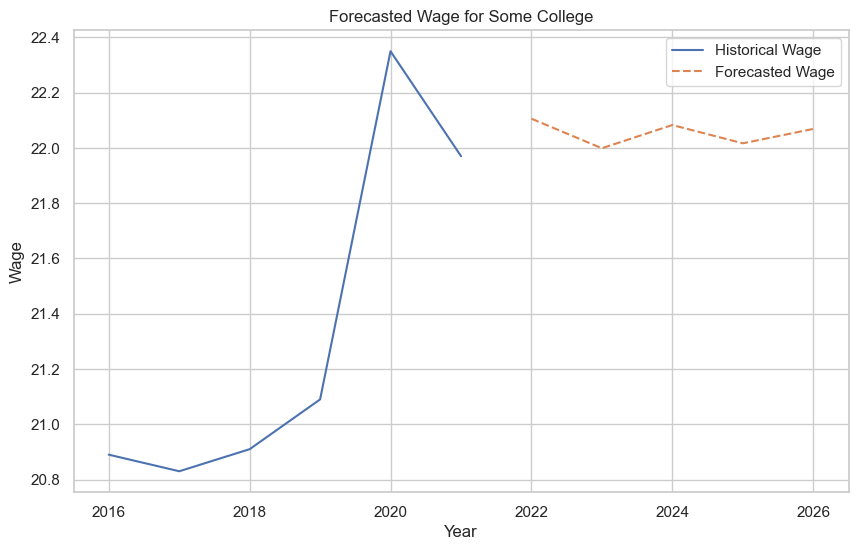

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(some_college_data['Wage'], label='Historical Wage')
plt.plot(forecast, label='Forecasted Wage', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.title('Forecasted Wage for Some College')
plt.legend()
plt.show()

## **Some College - Births**

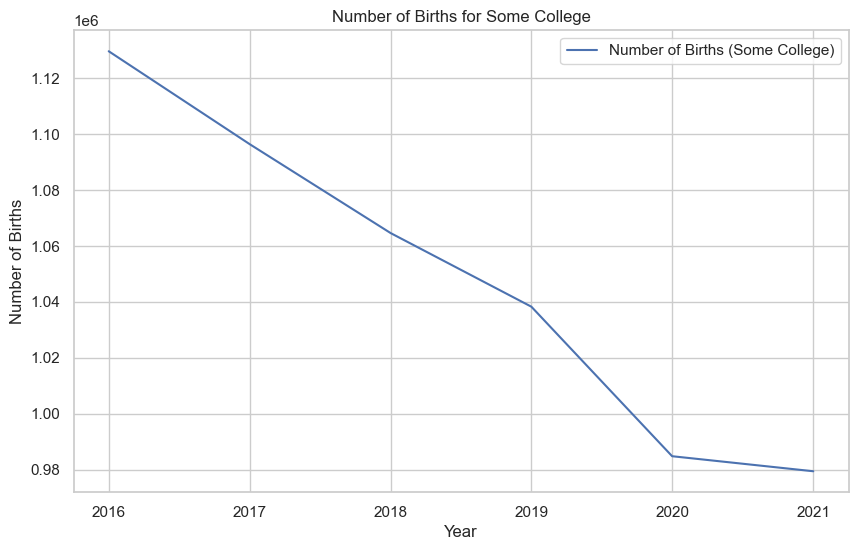

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(some_college_data['Number of Births'], label='Number of Births (Some College)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births for Some College')
plt.legend()
plt.show()

In [93]:
model = ARIMA(some_college_data['Number of Births'], order=(1, 1, 1)) 
model_fit = model.fit()

C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to 

In [94]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2022-01-01    959262.930440
2023-01-01    939141.665067
2024-01-01    919024.203161
2025-01-01    898910.544003
2026-01-01    878800.686876
Freq: AS-JAN, Name: predicted_mean, dtype: float64


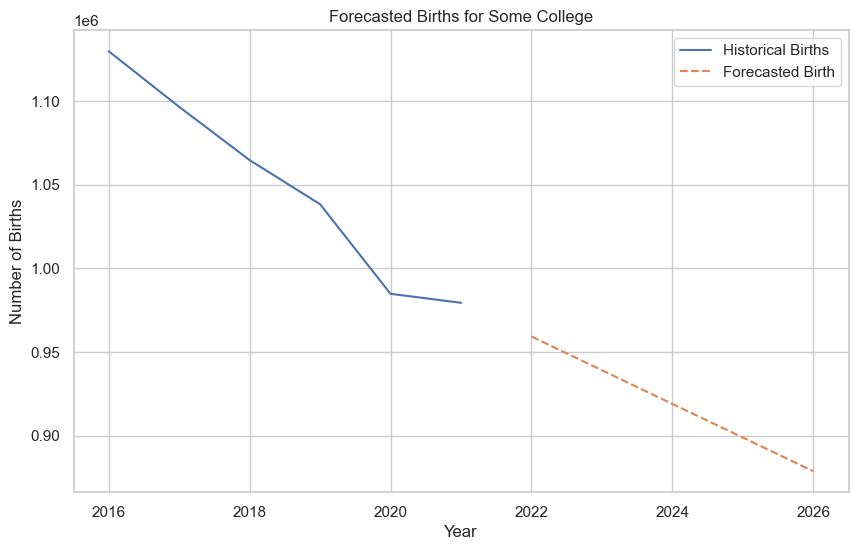

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(some_college_data['Number of Births'], label='Historical Births')
plt.plot(forecast, label='Forecasted Birth', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Forecasted Births for Some College')
plt.legend()
plt.show()

***
***
# **Time Series Analysis**
## **High School Diploma - Wage**

In [102]:
high_school_data = df[df["Mother's Education Level"] == 1]
high_school_data

,Mother's Education Level,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Wage
Year,,,,,
2016-01-01,1,979820,26.206863,3223.950000,18.33
2017-01-01,1,973025,26.307843,3219.581373,18.31
2018-01-01,1,966898,26.455882,3218.082353,18.49
2019-01-01,1,965810,26.552941,3209.938235,18.48
2020-01-01,1,944755,26.645098,3210.255882,19.35
2021-01-01,1,945610,26.783333,3203.977451,19.36


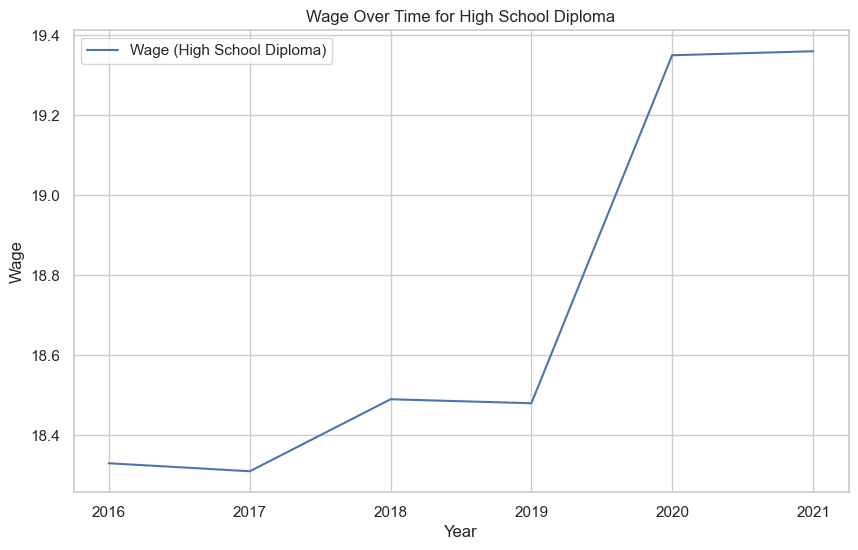

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(high_school_data['Wage'], label='Wage (High School Diploma)')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.title('Wage Over Time for High School Diploma')
plt.legend()
plt.show()

In [104]:
model = ARIMA(high_school_data['Wage'], order=(1, 1, 1))  
model_fit = model.fit()

C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to 

In [105]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2022-01-01    19.438385
2023-01-01    19.360892
2024-01-01    19.437502
2025-01-01    19.361765
2026-01-01    19.436640
Freq: AS-JAN, Name: predicted_mean, dtype: float64


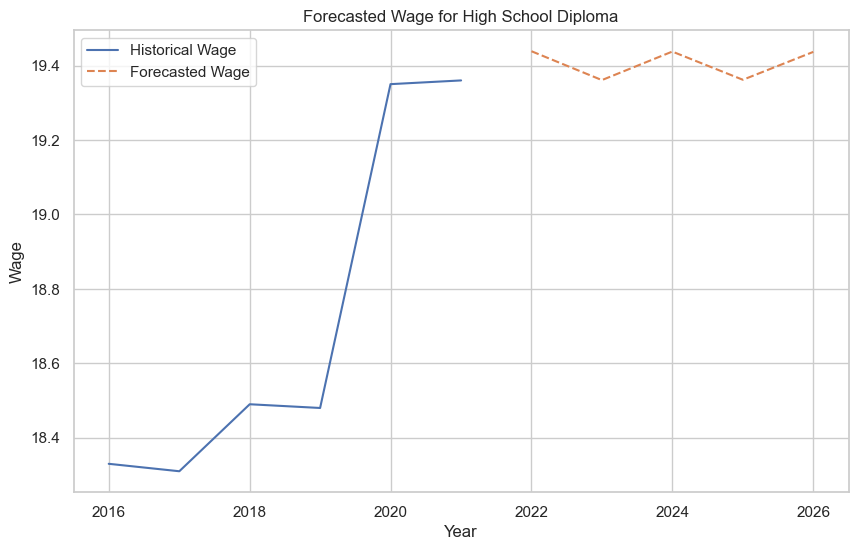

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(high_school_data['Wage'], label='Historical Wage')
plt.plot(forecast, label='Forecasted Wage', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.title('Forecasted Wage for High School Diploma')
plt.legend()
plt.show()

## **High School Diploma - Births**

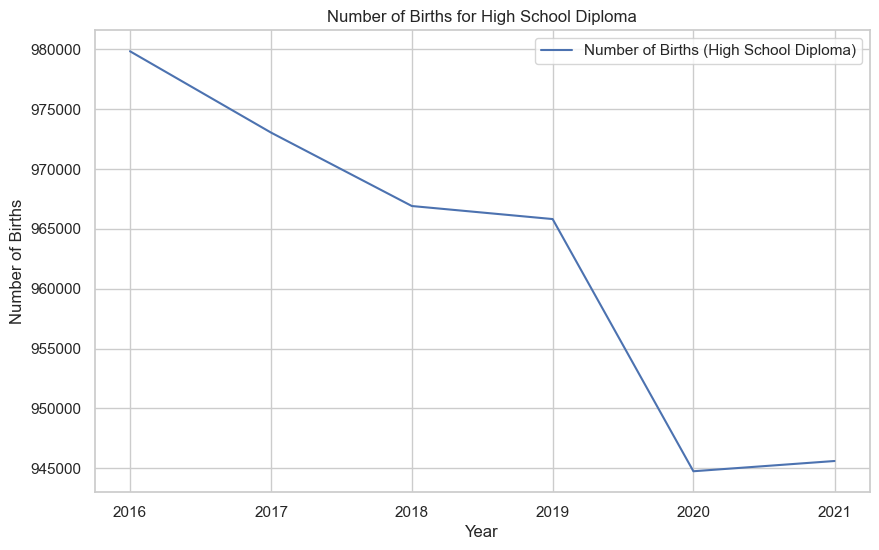

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(high_school_data['Number of Births'], label='Number of Births (High School Diploma)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births for High School Diploma')
plt.legend()
plt.show()

In [108]:
model = ARIMA(high_school_data['Number of Births'], order=(1, 1, 1)) 
model_fit = model.fit()

C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to 

In [109]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2022-01-01    945671.604158
2023-01-01    945733.207878
2024-01-01    945794.811160
2025-01-01    945856.414002
2026-01-01    945918.016407
Freq: AS-JAN, Name: predicted_mean, dtype: float64


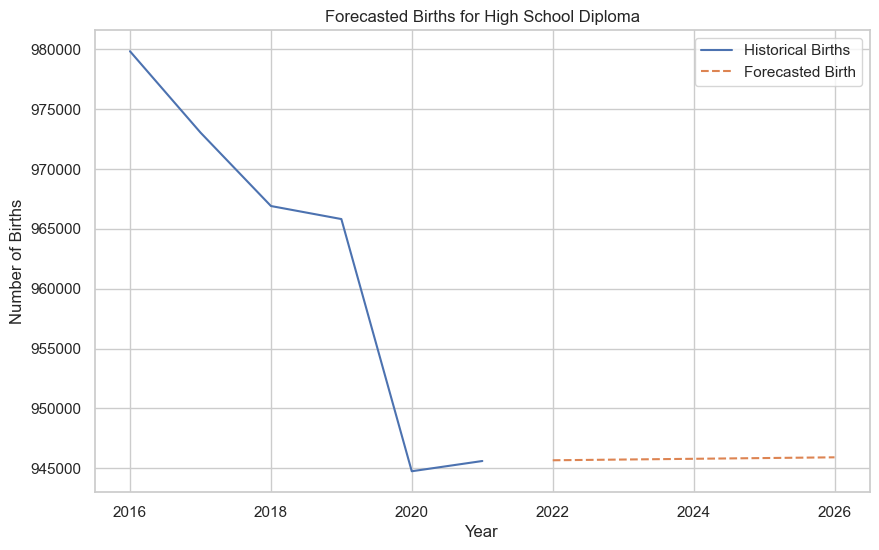

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(high_school_data['Number of Births'], label='Historical Births')
plt.plot(forecast, label='Forecasted Birth', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Forecasted Births for High School Diploma')
plt.legend()
plt.show()


***
***
# **Time Seies Analysis**
## **Less than High School - Wage**

In [111]:
less_than_hs_data = df[df["Mother's Education Level"] == 0]
less_than_hs_data

,Mother's Education Level,Number of Births,Average Age of Mother (years),Average Birth Weight (g),Wage
Year,,,,,
2016-01-01,0,538651,26.951961,3213.194608,13.11
2017-01-01,0,505626,27.117647,3209.135784,13.39
2018-01-01,0,475589,27.284314,3205.357843,13.36
2019-01-01,0,453275,27.324510,3199.428431,13.96
2020-01-01,0,422709,27.375490,3201.623529,14.40
2021-01-01,0,399382,27.371078,3196.373529,14.36


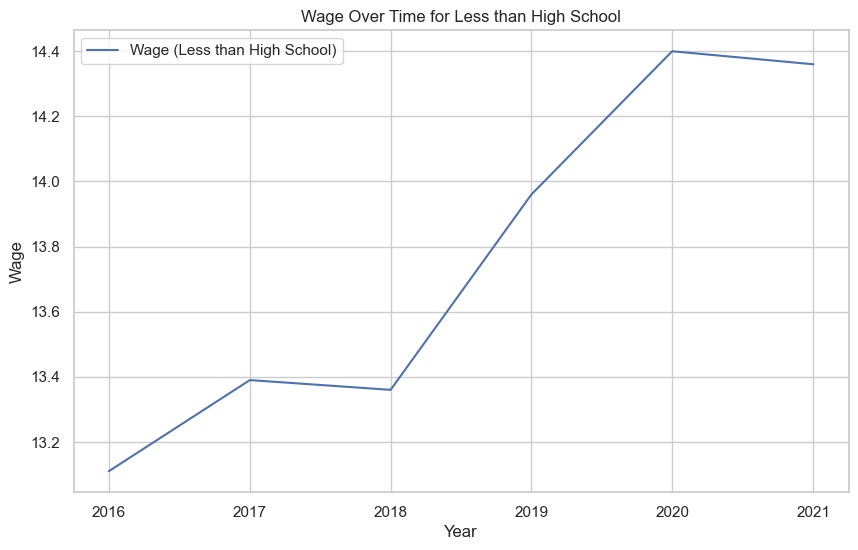

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(less_than_hs_data['Wage'], label='Wage (Less than High School)')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.title('Wage Over Time for Less than High School')
plt.legend()
plt.show()

In [114]:
model = ARIMA(less_than_hs_data['Wage'], order=(1, 1, 1))  
model_fit = model.fit()

C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [115]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2022-01-01    14.398145
2023-01-01    14.380538
2024-01-01    14.388665
2025-01-01    14.384914
2026-01-01    14.386646
Freq: AS-JAN, Name: predicted_mean, dtype: float64


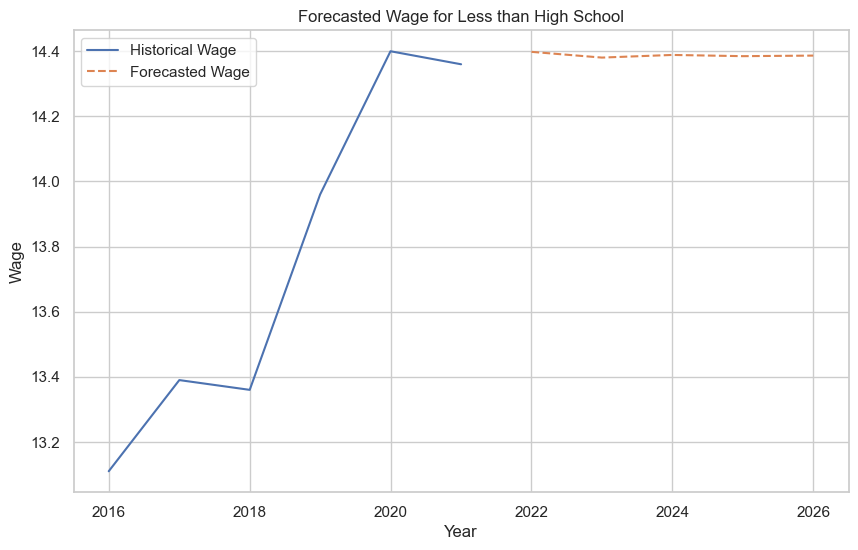

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(less_than_hs_data['Wage'], label='Historical Wage')
plt.plot(forecast, label='Forecasted Wage', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.title('Forecasted Wage for Less than High School')
plt.legend()
plt.show()

## **Less Than High School - Births**

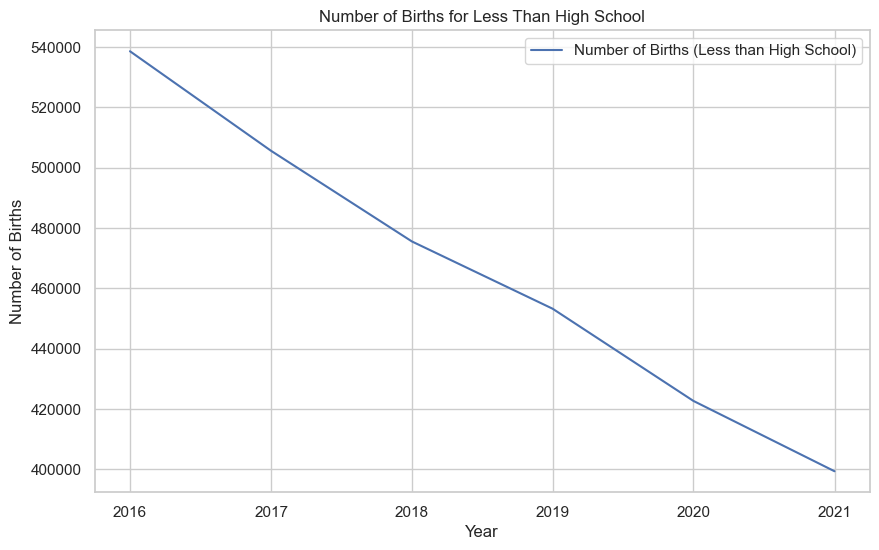

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(less_than_hs_data['Number of Births'], label='Number of Births (Less than High School)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births for Less Than High School')
plt.legend()
plt.show()

In [118]:
model = ARIMA(less_than_hs_data['Number of Births'], order=(1, 1, 1)) 
model_fit = model.fit()

C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\allie\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [119]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2022-01-01    376332.329674
2023-01-01    353556.772377
2024-01-01    331052.068280
2025-01-01    308814.996322
2026-01-01    286842.373749
Freq: AS-JAN, Name: predicted_mean, dtype: float64


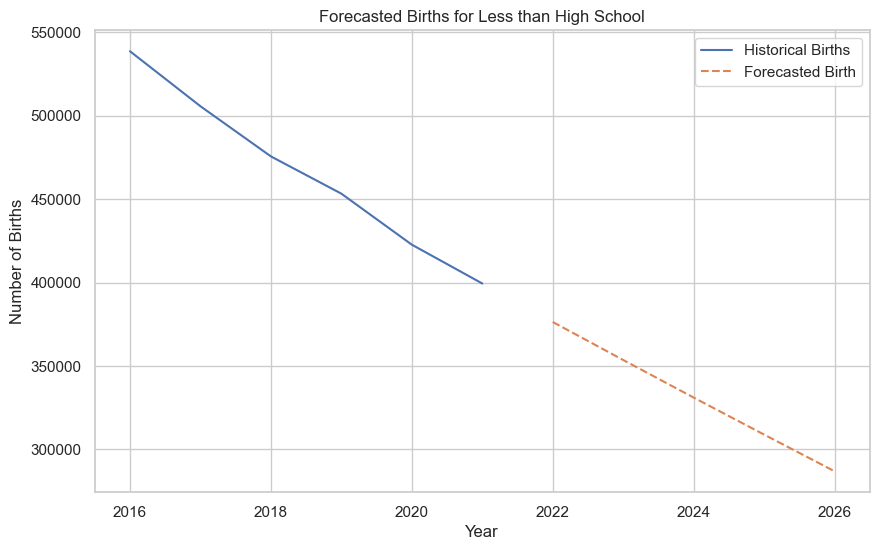

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(less_than_hs_data['Number of Births'], label='Historical Births')
plt.plot(forecast, label='Forecasted Birth', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Forecasted Births for Less than High School')
plt.legend()
plt.show()